<h3>Experiment description</h3>

**Researcher**: Randy Olson

In this experiment, we are simulating a group of swarm agents that are controlled by Markov brains. The Markov brains are evolved via a Moran process, where we vary the environment, agent morphology, and fitness function to determine what environmental features are conducive to the evolution of swarming behavior.

<h3>Moran process settings</h3>

ﬁtness proportional selection, 1% per-gene mutation rate, 5% gene duplication, 2% deletion rate, and no cross-over.

<h3>Swarm agent description</h3>

Swarm agents are controlled by Markov network brains.

They have a retina which covers 180°, split into 12 evenly-divided slices. A 1 or 0 for each slice is passed as input to the brain if another swarm agent is within viewing range of that retina slice.

A second retina layer performs exactly the same as the first swarm agent-detecting layer, except it signals the presence of a predator.

After being provided the retina input, the swarm agent's Markov brain chooses one of four possible actions: turn left 8°, turn right 8°, go forward one unit, or go forward two units.

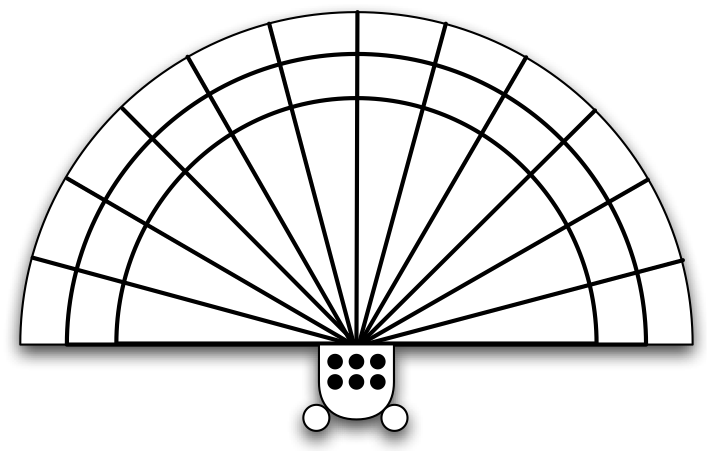

In [1]:
# run to display image of swarm agent design
from IPython.core.display import Image

Image(filename="morph.png")


<h3>Predator agent description</h3>

Since we are not studying predator behavior, we decided to hand-design the predator for this experiment. Thus the predator behavior described here remains fixed for every simulation.

Predator agents perform swooping attacks on the swarm, where they select a swarm agent to pursue, quickly fly towards that agent into the swarm, then fly out of the swarm regardless of whether the prey was caught or not.

Predator agents are faster than the swarm agents, but turn slower.

Predator agents select a target every simulation tick by selecting an agent inside its retina with a probability of $\frac{1}{d}$, where $d$ is the distance from the predator to the swarm agent. This makes closer swarm agents more likely to be targeted, but doesn't make it impossible for distant swarm agents to be selected as well. The predator chooses a new target every simulation tick so it can re-evaluate its targets and not get stuck chasing a single prey down endlessly.

This has two interesting implications:
<ul>
    <li>If swarm agents stay close together, they may confuse the predator (they're all equally likely to be selected)</li>
    <li>Lone swarm agents are more likely to get chased down</li>
</ul>

<h3><u>03/07/12</u></h3>

<h3>Hypothesis 1</h3>
    
Swarms observed in nature appear to react to the presence of predators due to individuals in the swarm attempting to escape the predator.

Therefore, we expect swarm behavior to be affected by the presence of predators.

<h3>Null hypothesis 1</h3>

Swarm behavior is not affected by the presence of predators.

<h3>How to test hypothesis</h3>

Measure swarm agent behavior with and without predators.

<h3>Control 1</h3>

The control fitness function will only select for agents who cluster together as a swarm, described by the equation below.

Swarm cohesion: $W_{S} = \sum_{t=0}^{t_{max}}\sum_{i=1}^{n}\frac{1}{r_i}$

where $n$ is the number of agents in the swarm (here, $n = 20$),

$t_{max}$ is the total number of updates for which the swarm is evaluated (here, $t_{max} = 2000$), and

$r$ is the distance of the agent to the center of the swarm at update $t$.

<h3>Treatment 1</h3>

We will include a single predator in the simulation as the swarm evolves.

The treatment fitness function will reward agents 50% for clustering together as a swarm and 50% for staying away from the predator, described by the equation:

Predator avoidance: $W_{P} = \sum_{t=0}^{t_{max}}\sum_{i=1}^{n}d$

where $d$ is defined as the distance between agent and predator (everything else is the same as above).

$W_{treatment} = W_{S}^{(1.0 - p)} * W_{P}^{p}$

Here, $p$ = 0.5, meaning that both fitness components are equally selected for.

**NOTE**: We chose a multipicative fitness function with exponents deciding the relative importance of each fitness component ($W_{S}$ or $W_{P}$) to even out the fitness contributions of either fitness component, since in the additive fitness function ($W_{S} + W_{P}$), $W_{P}$ often contributed to the majority of $W_{treatment}$, making $W_{S}$ mostly unimportant..

<h3>Data</h3>

Each experiment shall be performed in replicate 100 times.

Collect for best evolved swarm after 250 generations:
<ul>
    <li>Average bounding box size (the minimum rectangle it takes to encompass the entire swarm).</li>
    <li>Displacement of swarm center from the start of the simulation to the end of the simulation.</li>
    <li>Markov brain.</li>
</ul>

<h3><u>03/09/12</u></h3>

**NOTE**: For all data,

column[0] = Avg. Bounding Box Size

column[1] = Displacement

In [2]:

# Here, I generated some random data for the results of this experiment and put it in csv files.
# Python can also read txt files and other data formats, but Python has a built-in reader for csv files,
# so I recommend taking the easy road and saving your experiment data in csv format. :-)

# Library for reading and parsing csv files
import csv

# Library for performing all kinds of scientific calculations, including statistics.
import scipy

# My personal library that contains some useful helper functions
import rso_stats

# Read and parse data for control1
control1 = csv.reader(open('control1.csv', 'rb'), delimiter=',')
control1, control1_columns = rso_stats.parse_csv_data(control1)

# Let's take a look at the mean of the bounding box sizes
control1_mean_bbsize =  scipy.mean(control1[control1_columns[0]])

print "Mean of bounding box sizes for control1:", control1_mean_bbsize

Mean of bounding box sizes for control1: 1.4

This mean is way too low. There must be something wrong with the control. I will need to generate some videos of the swarms to see what's happening.

<h3><u>03/10/12</u></h3>

After generating some videos of the control swarms, it became obvious that the fitness function for $W_{S}$ is incorrect: all of the swarm agents are moving right on top of each other to stay as close as possible! The cohesion fitness function shall be changed to:

$W_{S} = \sum_{t=0}^{t_{max}}\sum_{i=1}^{n}$:

if $r_i < 10: 0$

if $r_i >= 10: \frac{1}{r_i}$

This will force the swarm agents to keep a little bit of distance from each other.

<h3><u>03/13/12</u></h3>

Let's take a look at the fixed control data.

In [3]:
# Read and parse data for control1-fixed
control1_fixed = csv.reader(open('control1-fixed.csv', 'rb'), delimiter=',')
control1_fixed, control1_fixed_columns = rso_stats.parse_csv_data(control1_fixed)

# Let's take a look at the mean of the bounding box sizes
control1_fixed_mean_bbsize =  scipy.mean(control1_fixed[control1_fixed_columns[0]])

print "Mean of bounding box sizes for control 1 (fixed):", control1_fixed_mean_bbsize

Mean of bounding box sizes for control 1 (fixed): 101.29

Much better! Now let's start doing some initial plotting to see what our data looks like.

&lt;matplotlib.text.Text at 0x6daa2d0&gt;

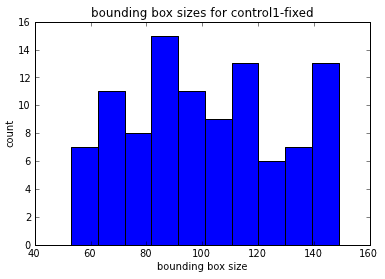

In [4]:
# Histogram of bounding box sizes for control1-fixed
hist(control1_fixed[control1_fixed_columns[0]])
title("bounding box sizes for control1-fixed")
xlabel("bounding box size")
ylabel("count")








&lt;matplotlib.text.Text at 0x65a7790&gt;

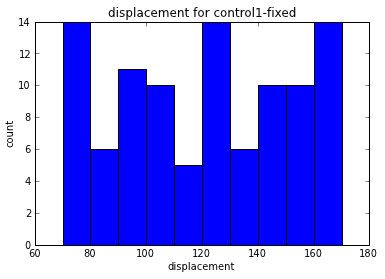

In [5]:
# Histogram of displacement for control1-fixed
hist(control1_fixed[control1_fixed_columns[1]])
title("displacement for control1-fixed")
xlabel("displacement")
ylabel("count")

&lt;matplotlib.text.Text at 0x443e830&gt;

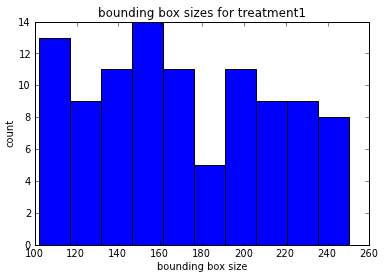

In [6]:
# Read and parse data for treatment1
treatment1 = csv.reader(open('treatment1.csv', 'rb'), delimiter=',')
treatment1, treatment1_columns = rso_stats.parse_csv_data(treatment1)

# Histogram of bounding box sizes for treatment1
hist(treatment1[treatment1_columns[0]])
title("bounding box sizes for treatment1")
xlabel("bounding box size")
ylabel("count")













&lt;matplotlib.text.Text at 0x4433ad0&gt;

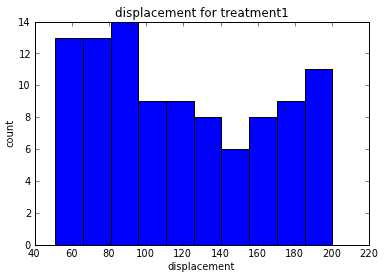

In [7]:
# Histogram of displacement for treatment1
hist(treatment1[treatment1_columns[1]])
title("displacement for treatment1")
xlabel("displacement")
ylabel("count")

The data doesn't really seem to be normally distributed, which probably means standard error bars will be insufficient to establish 95% confidence intervals. However, for now, let's just use standard error as a semi-reliable estimate of the range of the means.

**NOTE**: Use bootstrapped 95% confidence intervals.

Let's compare the means and see if the treatment resulted in a significantly different avg. bounding box size or displacement from the control.

([&lt;matplotlib.axis.XTick at 0x6cd8710&gt;, &lt;matplotlib.axis.XTick at 0x6cbf730&gt;],
 &lt;a list of 2 Text xticklabel objects&gt;)

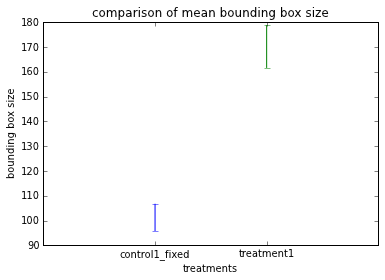

In [8]:
from scipy import stats

# Compare mean bounding box sizes
control1_fixed_bbsize_mean = scipy.mean(control1_fixed[control1_fixed_columns[0]])
control1_fixed_bbsize_stderr = 2.0 * stats.sem(control1_fixed[control1_fixed_columns[0]])
treatment1_bbsize_mean = scipy.mean(treatment1[treatment1_columns[0]])
treatment1_bbsize_stderr = 2.0 * stats.sem(treatment1[treatment1_columns[0]])

figure()
title("comparison of mean bounding box size")
xlabel("treatments")
ylabel("bounding box size")
errorbar([1], control1_fixed_bbsize_mean, control1_fixed_bbsize_stderr)
errorbar([1.01], treatment1_bbsize_mean, treatment1_bbsize_stderr)
xlim(0.99, 1.02)
xticks( [1, 1.01] , ('control1_fixed', 'treatment1') )












treatment1 seems to significantly increase the bounding box size. Let's bootstrap some 95% confidence intervals to see if they're really significantly different.

([&lt;matplotlib.axis.XTick at 0x6d4d270&gt;, &lt;matplotlib.axis.XTick at 0x6d4d030&gt;],
 &lt;a list of 2 Text xticklabel objects&gt;)

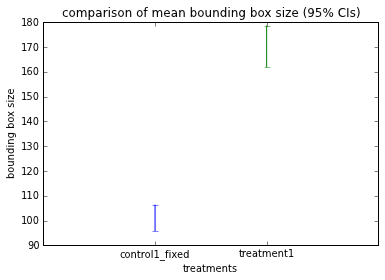

In [9]:
# Compute 95% CIs for bounding box size
control1_fixed_bbsize_95CI = rso_stats.ci_errorbar(control1_fixed[control1_fixed_columns[0]],
                                                   scipy.mean)
treatment1_bbsize_95CI = rso_stats.ci_errorbar(treatment1[treatment1_columns[0]], scipy.mean)

figure()
title("comparison of mean bounding box size (95% CIs)")
xlabel("treatments")
ylabel("bounding box size")
errorbar(1, control1_fixed_bbsize_mean, yerr=control1_fixed_bbsize_95CI)
errorbar(1.01, treatment1_bbsize_mean, yerr=treatment1_bbsize_95CI)
xlim(0.99, 1.02)
xticks( [1, 1.01] , ('control1_fixed', 'treatment1') )

We can now say that we are 95% confident that treatment1 significantly increases the bounding box size.

To gauge *how* confident we are that the two means are significantly different, let's generate a P value with a MWW RankSum test.

In [10]:

z_stat, p_val = stats.ranksums(control1_fixed[control1_columns[0]],
                               treatment1[treatment1_columns[0]])

print "MWW RankSum P =", p_val

MWW RankSum P = 8.77254926374e-24

With a P = 8.77254926374$e^{-24}$, we can say with over 99% certainty that the mean bounding box size is significantly different between control1-fixed and treatment1.

Now let's compare the displacement of the swarm in the two experiments.

([&lt;matplotlib.axis.XTick at 0x7907b0&gt;, &lt;matplotlib.axis.XTick at 0x6623bb0&gt;],
 &lt;a list of 2 Text xticklabel objects&gt;)

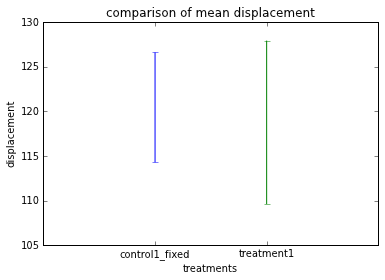

In [11]:
# Compare mean displacement
control1_fixed_displacement_mean = scipy.mean(control1_fixed[control1_fixed_columns[1]])
control1_fixed_displacement_stderr = 2.0 * stats.sem(control1_fixed[control1_fixed_columns[1]])
treatment1_displacement_mean = scipy.mean(treatment1[treatment1_columns[1]])
treatment1_displacement_stderr = 2.0 * stats.sem(treatment1[treatment1_columns[1]])

figure()
title("comparison of mean displacement")
xlabel("treatments")
ylabel("displacement")
errorbar([1], control1_fixed_displacement_mean, control1_fixed_displacement_stderr)
errorbar([1.01], treatment1_displacement_mean, treatment1_displacement_stderr)
xlim(0.99, 1.02)
xticks( [1, 1.01] , ('control1_fixed', 'treatment1') )

The mean displacement does not seem to be significantly different between control1_fixed and treatment1, especially since the error bars overlap entirely.

Let's perform a MWW RankSum test on the two data sets to get a better idea of how different they are.

In [12]:
z_stat, p_val = stats.ranksums(control1_fixed[control1_columns[1]],
                               treatment1[treatment1_columns[1]])

print "MWW RankSum P =", p_val

MWW RankSum P = 0.504743283774

With P = 0.504743283774, the displacement between control1_fixed and treatment1 is not significantly different.

A lab mate asked what would happen to the mean displacement if we had two predators instead of just one.

<h3>Treatment 2</h3>

Everything is the same as in Treatment 1, but there are two predators in the simulation instead of just one.

<h3><u>03/15/12</u></h3>

&lt;matplotlib.text.Text at 0x790d30&gt;

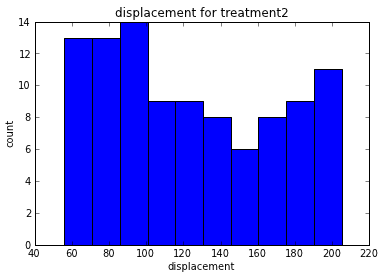

In [13]:
# Read and parse data for treatment2
treatment2 = csv.reader(open('treatment2.csv', 'rb'), delimiter=',')
treatment2, treatment2_columns = rso_stats.parse_csv_data(treatment2)

# Histogram of displacement for treatment2
hist(treatment2[treatment2_columns[1]])
title("displacement for treatment2")
xlabel("displacement")
ylabel("count")

This data does not really look normally distributed. Standard error will make an OK first-look estimation, but we will need to bootstrap 95% confidence intervals to get a reliable estimate of the range of the mean.

([&lt;matplotlib.axis.XTick at 0x8766ff0&gt;,
  &lt;matplotlib.axis.XTick at 0x8766bd0&gt;,
  &lt;matplotlib.axis.XTick at 0x87768d0&gt;],
 &lt;a list of 3 Text xticklabel objects&gt;)

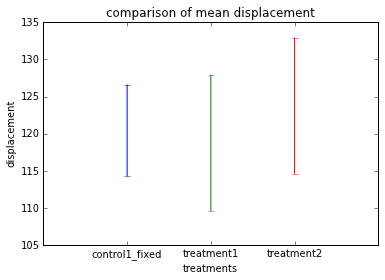

In [14]:
# Compare mean displacement
control1_fixed_displacement_mean = scipy.mean(control1_fixed[control1_fixed_columns[1]])
control1_fixed_displacement_stderr = 2.0 * stats.sem(control1_fixed[control1_fixed_columns[1]])
treatment1_displacement_mean = scipy.mean(treatment1[treatment1_columns[1]])
treatment1_displacement_stderr = 2.0 * stats.sem(treatment1[treatment1_columns[1]])
treatment2_displacement_mean = scipy.mean(treatment2[treatment2_columns[1]])
treatment2_displacement_stderr = 2.0 * stats.sem(treatment2[treatment2_columns[1]])

figure()
title("comparison of mean displacement")
xlabel("treatments")
ylabel("displacement")
errorbar([1], control1_fixed_displacement_mean, control1_fixed_displacement_stderr)
errorbar([1.01], treatment1_displacement_mean, treatment1_displacement_stderr)
errorbar([1.02], treatment2_displacement_mean, treatment2_displacement_stderr)
xlim(0.99, 1.03)
xticks( [1, 1.01, 1.02] , ('control1_fixed', 'treatment1', 'treatment2') )

treatment2 appears to result in a slightly higher displacement on average, but the error bars still overlap.

To confirm that all three displacement means are not actually significantly different, let's do an ANOVA on all three distributions.

The null hypothesis of the ANOVA is that all three distributions are the same. Thus if the P value from the ANOVA is > 0.05, we can accept the null hypothesis.

In [15]:
f_val, p_val = stats.f_oneway(control1_fixed[control1_fixed_columns[1]],
                              treatment1[treatment1_columns[1]],
                              treatment2[treatment2_columns[1]])

print "ANOVA P =", p_val

ANOVA P = 0.68568628678

With an ANOVA P = 0.68568628678, we can say with high certainty that the mean displacement of the swarm in all three experiments are the same.

This means that the presence of the predator has little impact on the mean displacement of the swarm in our model.

<h3>Swarm videos</h3>

Only rewarding cohesion (100% $W_{S}$): http://adamilab.mmg.msu.edu/wp-content/uploads/2011/11/swarm-nodeath-p0.00.mov

Half rewarding cohesion, half rewarding predator avoidance (50% $W_{S}$, 50% $W_{P}$): http://adamilab.mmg.msu.edu/wp-content/uploads/2011/11/swarm-nodeath-p0.50.mov

<h3>Conclusions</h3>

The presence of a predator significantly increases the bounding box size of the swarm in our model.

Looking at the swarm videos, the swarms that are rewarded for predator avoidance seem more erratic than the swarms only rewarded for cohesion. The erratic behavior of the swarm may be an anti-predator behavior (need data).

Predator presence has no significant effect on the displacement of the swarm in our model.

<h3>Future work</h3>

<ul>
    <li>Find a way to measure how erratic the swarm is, and if there is a relationship between rewarding predator avoidance and how erratic the swarm is</li>
    <li>Examine Markov brains to see if there is a relationship between Markov brain connectivity and bounding box size</li>
</ul>